<a href="https://colab.research.google.com/github/diplomado-bigdata-machinelearning-udea/Curso1/blob/master/s10/s10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

<p><a name="contents"></a></p>

# Contenido Sesión 10

- <a href="#dTrees">1. Árboles de decisión.</a><br>
- <a href="#rForest">2. Bosques aleatorios.</a><br>
- <a href="#kMeans">3. Clustering: k-means</a><br>

<p><a name="dTrees"></a></p>

# 1. Árboles de decisión

[[Contenidos]](#contents)

Los árboles de decisión son algoritmos que pueden ser usados tanto para clasificación como para regresión. Consisiten en una secuencia de preguntas si/sinó (if/else) que llevan a la decisión final.






Suponga que se desea clasificar, con la menor cantidad de preguntas posibles, los siguientes cuatro animales: Águila (Hawk), Pingüino (Penguin), Delfín (Dolphin) y Oso (Bear). Tan solo haciendo tres preguntas, en dos niveles, es posible identificar a que animal corresponde. Observe el siguiente diagrama.



<p><img alt="Colaboratory logo" height="300px" src="https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s10/desTreeAnimals.png" align="center" hspace="10px" vspace="0px"></p>



En lenguaje de ML podemos decir entonces que tenemos cuatro clases: Águila (Hawk), Pingüino (Penguin), Delfín (Dolphin) y Oso (Bear) y son necesarias las siguientes tres características para poder hacer la calsificación: tener plumas, poder volar y tener aletas. Cada nodo del digrama anterior es llamado hoja (*leaf*)

In [ ]:
! pip install mglearn;

     |████████████████████████████████| 542kB 3.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=aa1403427d13e58edfaed22a988b9a6d51def7e8c2f42e39c9ea5e72aba57967
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [ ]:
from sklearn.datasets import *
import numpy as np

import matplotlib.pyplot as plt
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(400, noise=0.1, random_state=10)

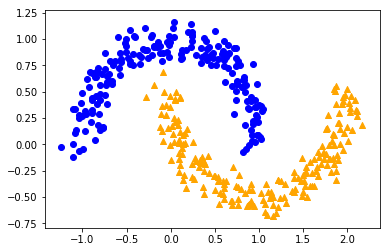

In [ ]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="blue")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="orange", marker='^')

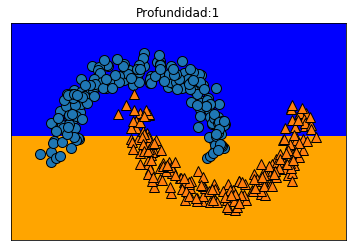

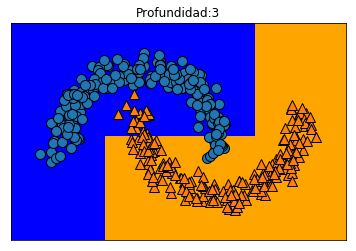

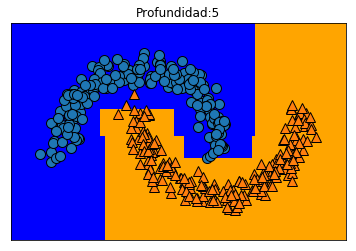

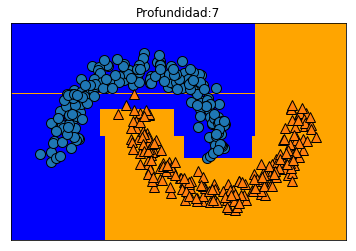

In [ ]:
from matplotlib.colors import ListedColormap
for i in range(1,9,2):
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X,y)

  plt.figure()
  mglearn.plots.plot_2d_classification(dt,X,fill=True, cm=ListedColormap(['blue','orange']))
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
  plt.title('Profundidad:'+str(i))
  plt.show()

La predicción de a qué clase pertenece un punto, depende entonces del lugar donde se encuentre en el espacio de características y pertenece a la clase mayoritaría, si solo hay una clase mayoritaria se dice que la hoja es pura (*pure leaf*). Veamos el digrama de árbol con profundidad 7 para ver como se hizo la clasificación.


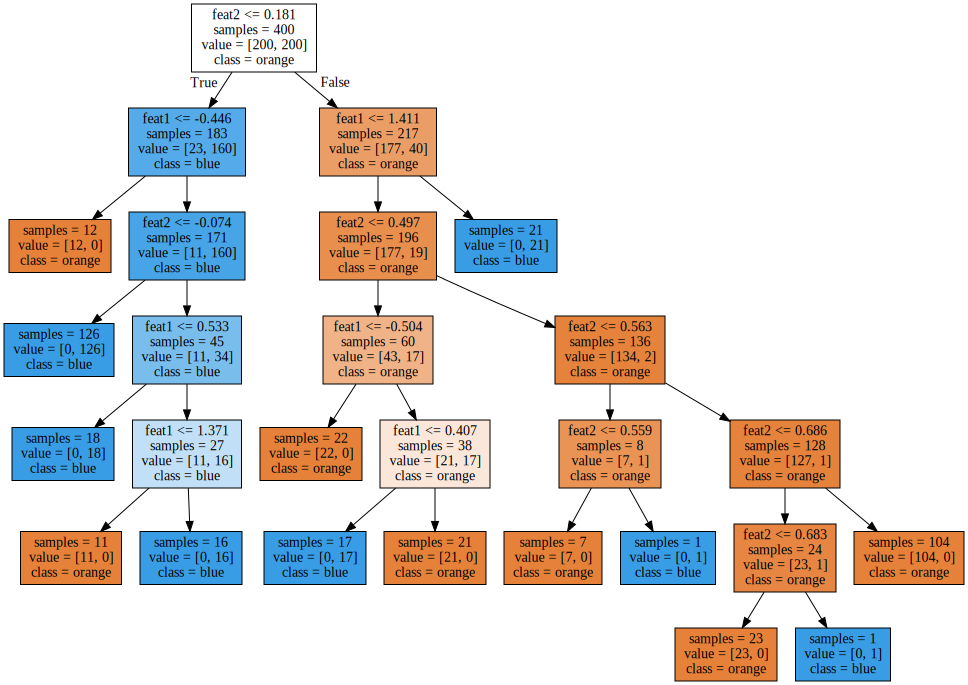

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt, out_file="tree.dot", class_names=["orange", "blue"],
  feature_names=["feat1", "feat2"], impurity=False, filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)


Note que si el árbol evoluciona hasta que solo se tengan hojas puras, esto corresponde a un modelo de muy alta complejidad lo cual conlleva la aparición de sobreajuste, tal y como se ve en la figura de clasificación con profundidad 7. 


Existen dos estrategias comunes para prevenir el sobreajuste. La primera, llamada pre-podado (pre-pruning), consiste en detener la evolución del árbol, por ejemplo limitando el número de capas (profundidad), el número de hojas o exigiendo un número mínimo de puntos por nodo para proceder a dividirlo. La segunda estrategia se llama post-podado (post-pruning), la cual consiste en remover o fusionar nodos que contienen poca información. La primera se puede implementar facilmente en sklearn con alguno de los hiperparámetros `max_depth` (profundidad del árbol), `max_leaf_nodes` (número máximo de nodos hoja), o `min_samples_split` (número mínimo de muestras que debe tener el nodo antes de dividise), entre otros. Normalmente, fijando alguno de esos parámetros es suficiente para evitar el sobreajuste. 

Veamos ahora el método usado por los árboles de decisión para tomar la importancia de las características. Existen dos métodos principales: usando el coeficiente de Gini o la entropía. Para seleccionar el método a usar en `sklearn` podemos invocar `criterion='gini'` o `criterion='entropy'`.

Sin entrar en detalle matemáticos, podemos decir que ambas métricas evalúan la inhomogeneidad de los datos. El objetivo es entonces encontrar las características que permitan obtener nodos más puros, es decir, menos inhomogéneos en cada etapa de la decisión. Para ver la importancia de las caracteríticas es posible usar `feature_importances_`. Para el ejemplo de juguete que hemos venído trabajando veamos la importancia de las carcterísticas. 



In [ ]:
dt.feature_importances_

array([0.45779901, 0.54220099])

Vemos entonces que la segunda caraterística tiene mayor importancia que la primera, por eso el árbol mostrado en la diagrama de decisión de la figura de arriba inicia con esta caraterística.

Veamos ahora la importancia de carateríticas para un dataset mas complejo como el de cancer.

In [ ]:
cancer = load_breast_cancer()
X_can=cancer.data
y_can=cancer.target
X_can.shape, y_can.shape

((569, 30), (569,))

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_can_train, X_can_test, y_can_train, y_can_test = train_test_split(X_can, y_can, test_size=0.3, random_state=1)

In [ ]:
cancerTree=DecisionTreeClassifier().fit(X_can_train,y_can_train)
cancerTree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01064558,
       0.        , 0.        , 0.02222751, 0.        , 0.        ,
       0.00352815, 0.        , 0.00893956, 0.        , 0.        ,
       0.02896418, 0.        , 0.        , 0.00715165, 0.00858198,
       0.00965473, 0.09089597, 0.78864361, 0.        , 0.        ,
       0.        , 0.        , 0.02076709, 0.        , 0.        ])

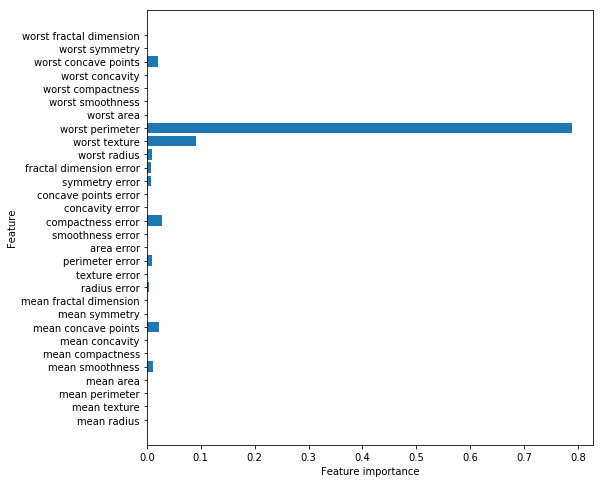

In [ ]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.figure(figsize=(8,8))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  
plot_feature_importances_cancer(cancerTree)

In [ ]:
from sklearn import metrics
y_can_pred = cancerTree.predict(X_can_test)
print("Accuracy:",metrics.accuracy_score(y_can_test, y_can_pred))

Accuracy: 0.9649122807017544


Podemos decir como conclusión que los árboles de desición tienen dos ventajas respecto a los demás algoritmos. El modelo resultante puede ser comprendido y visualizado fácilmente y los algoritmos son independientes de la escala de los datos.

Por otro lado, la principal falencia es que los árboles de decisión suelen tender a sobreajustar los datos, incluso cuando se aplica el  pre-podado. Para evitarlo, es posible utilizar métodos de conjunto (ensemble methods) como los que veremos a continuación.

<p><a name="rForest"></a></p>

# 2. Bosques aleatorios.

[[Contenidos]](#contents)

Llamamos método de ensamble a los métodos en los cuales se unen diferentes tipos de algorítmos o el mísmo algorítmo multiples veces con el fin de crear un predictor más robusto.

El método de bosques aleatorios no implementa un algorítmo de ML nuevo, como dijimos, en realidad es un ensamble de árboles de desición en el cual el entrenamiento se realiza mediante bootstraping y la desición final se toma con la moda (para clasificación) o la media (para regresión) de las predicciones de cada árbol.



![](http://www.globalsoftwaresupport.com/wp-content/uploads/2018/02/ggff5544hh.png)

Existen varias ventajas de usar un bosque aleatorio:


*   Se usa bootstraping de los datos de entrenamiento, ésto hace que sea difícil sobreajustar los árboles, por el contrario ésto hace que cada árbol disminuya su varianza y al usar el metodo de "votación" se cancelan los sesgos. **Los bosques aleatorios son excelentes en el bias-variance tradeoff**.
*   Es un método muy robusto respecto al ruido en los datos.
*   Puede tenerse la importancia relativa de las carácterísticas, lo cual nos permite hacer selección de las mísmas para hacer reducción dimensional.
*   Puede entrenarse en paralelo cada árbol.

Eso si, tiene algunas desventajas:


*   Al ser un método de ensamble puede ser muy costoso computacionalmente, tanto para entrenamiento como para predicción.
*   Su interpretabilidad no es tan simple como la de un sólo árbol.




**Ejemplo:** Usemos un bosque aleatorio denuevo sobre el dataset de cancer:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cancerForest = RandomForestClassifier(n_estimators=500)
cancerForest = cancerForest.fit(X_can_train,y_can_train)
cancerForest.feature_importances_

array([0.04862427, 0.01536952, 0.0565668 , 0.05693541, 0.00553411,
       0.0080763 , 0.04850875, 0.0792377 , 0.00330927, 0.0032866 ,
       0.01153818, 0.00405489, 0.01343476, 0.03367665, 0.00338135,
       0.00396878, 0.00449519, 0.00538046, 0.00276601, 0.00379103,
       0.10307524, 0.01632812, 0.14169273, 0.11804312, 0.01029486,
       0.01913386, 0.03108922, 0.13526603, 0.00866063, 0.00448017])

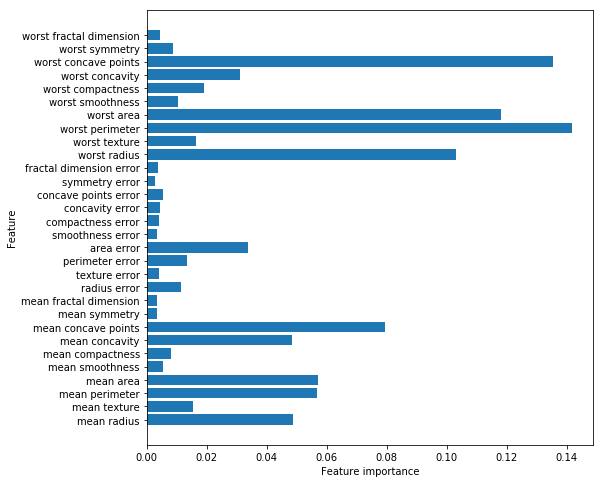

In [ ]:
plot_feature_importances_cancer(cancerForest)

In [ ]:
y_can_pred = cancerForest.predict(X_can_test)
print("Accuracy:",metrics.accuracy_score(y_can_test, y_can_pred))

Accuracy: 0.9415204678362573


Note que al usar el bosque aleatorio las carácteristicas que en el árbol parecían no tener importancia ahora si tienen algún tipo de importancia, ésto se debe al bootstraping, con el cual la varianza en las muestras es mayor y por tanto se extrae más información (más estadística) de nuestros datos.
Además note el aumento en la precisión del modelo.

**Nota:** Recuerde que al clasificar el bosque aleatorio predice la moda de las clases predichas por los árboles que lo componen, si lo que se desea es hacer regresión el bosque predice la media de las predicciones dadas por los árboles. En ese caso debe importar el estimador RandomForestRegressor (`from sklearn.ensemble import RandomForestRegressor`).

## Ejercicio 1:

Imagine que es un investigador médico que recopila datos para un estudio. Ha recopilado datos sobre un conjunto de pacientes, todos los cuales padecían la misma enfermedad. Durante su curso de tratamiento, cada paciente respondió a uno de los 5 medicamentos, Medicamento A, Medicamento B, Medicamento c, Medicamento x e y.

Parte de su trabajo es construir un modelo para descubrir qué medicamento podría ser apropiado para un futuro paciente con la misma enfermedad. Los conjuntos de características de este conjunto de datos son la edad (age), el sexo (sex), la presión arterial (BP), el colesterol de los pacientes (Cholesterol), y la razón entre la concentración de sodio y potasio en la sangre (Na_to_K). La variable objetivo es el medicamento al que respondió cada paciente.

**1**. Construya un árbol de decisión para predecir la clase de droga a prescribir para un nuevo paciente.

**2**. Construya un modelo utilizando bosques aleatorios.


In [ ]:
#Importemos la base de datos y exploremos sus caracteristicas
import pandas as pd

drugs = pd.read_csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s10/drug200.csv")

drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
print("Datos nulos: \n")
print(drugs.isnull().any() , '\n')
print("Dimensiones del dataset: \n")
print(drugs.shape, '\n')
print("Tipo de datos: \n")
print(drugs.dtypes)

Datos nulos: 

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool 

Dimensiones del dataset: 

(200, 6) 

Tipo de datos: 

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


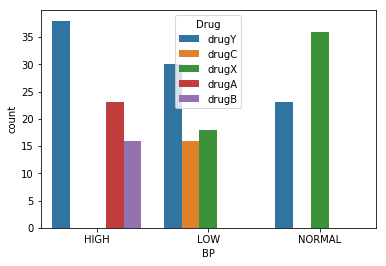

In [ ]:
import seaborn as sns

sns.countplot(data = drugs, x = "BP", hue = "Drug");

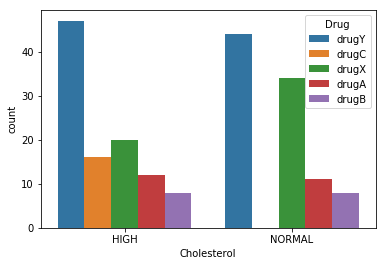

In [ ]:
sns.countplot(data = drugs, x = "Cholesterol", hue = "Drug");

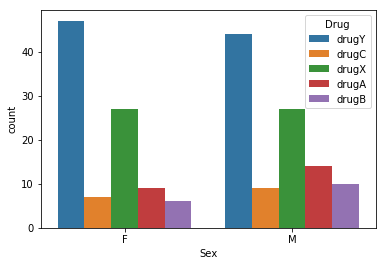

In [ ]:
sns.countplot(data = drugs, x = "Sex", hue = "Drug");

En el dataset hay algunas características que son del tipo categórico. Debemos convertir estas caracterísitcas a un tipo numérico, ya que los árboles de decisión no pueden manejar variables categóricas. Utilicemos, en este caso, el estimador `OneHotEncoder` de la librería de sklearn para realizar la codificación de las características y el estimador `LabelEncoder` para codificar las etiquetas:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

ohe = OneHotEncoder(sparse = False)

le = LabelEncoder()

#definimos un nuevo dataset que contiene las variables categóricas codificadas
df = pd.DataFrame(ohe.fit_transform(drugs.loc[:,['Sex', 'BP','Cholesterol' ] ]) , columns= ['Female', 'Male','HIGH', 'LOW', 'NORMAL','HIGH', 'NORMAL' ])

#añadimos a este nuevo dataset las variables de tipo numérico y las etiquetas codificadas por LE
df['Age'] = drugs.Age
df['Na_to_K'] = drugs.Na_to_K
df['Drug'] = le.fit_transform(drugs.Drug)

df.head()

,Female,Male,HIGH,LOW,NORMAL,HIGH,NORMAL,Age,Na_to_K,Drug
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,23,25.355,4
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,47,13.093,2
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,47,10.114,2
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,28,7.798,3
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,61,18.043,4


Separemos nuestros conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['Drug']

X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 10)

Antes de entrenar el modelo, utilicemos un GridSearch para encontrar los hiperparámetros `max_depth` y `max_leaf_nodes` óptimos

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_param = {'max_depth':np.arange(2,20), 'max_leaf_nodes':np.arange(2,20)}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(dt, grid_param , n_jobs=-1, cv=5, iid=False)

grid.fit(X_train,y_train)
print(grid.best_params_)
print("")
print(grid.best_estimator_)

{'max_depth': 4, 'max_leaf_nodes': 6}

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


Realicemos el entrenamiento y visualicemos el resultado


In [ ]:
#Elegimos como modelo el mejor estimador encontrado anteriormente
model = grid.best_estimator_

#Entrenamos el modelo
model.fit(X_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#se genera un archivo con extensión .dot
export_graphviz(model, out_file="drug_tree.dot", feature_names=X_train.columns, class_names=drugs['Drug'], rounded=True, filled=True)

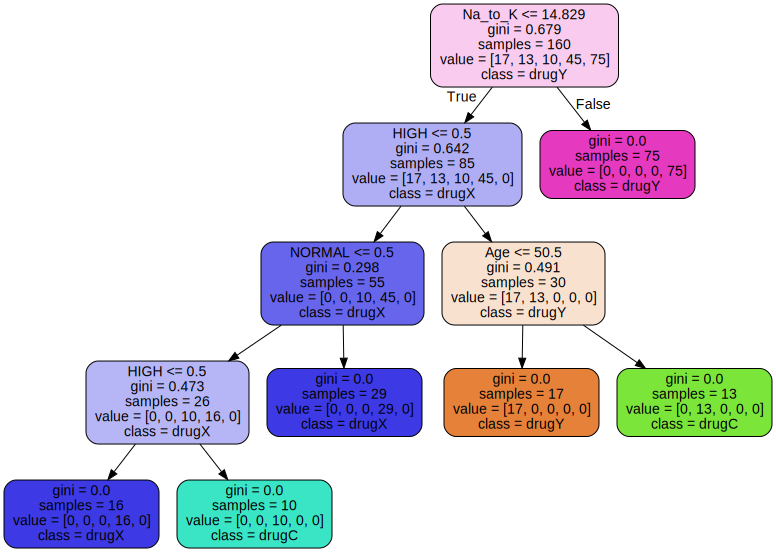

In [ ]:
with open("drug_tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

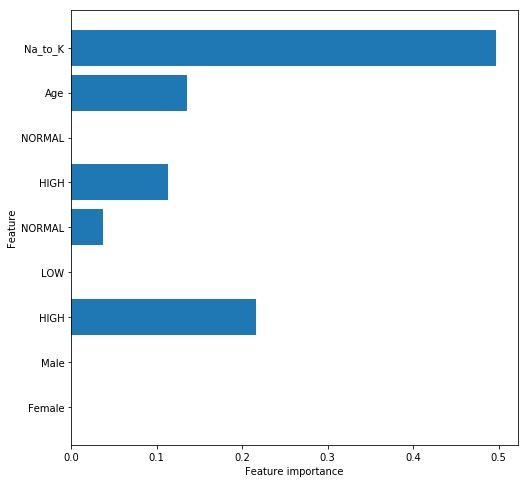

In [ ]:
#Veamos la importancia de cada característica
def plot_feature_importances_cancer(model):
  n_features = df.iloc[:,:-1].shape[1]
  plt.figure(figsize=(8,8))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), df.columns.to_list())
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  
plot_feature_importances_cancer(model)

Realicemos una evaluación del rendimiento del modelo


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Text(37.32000000000001, 0.5, 'Predicted label')

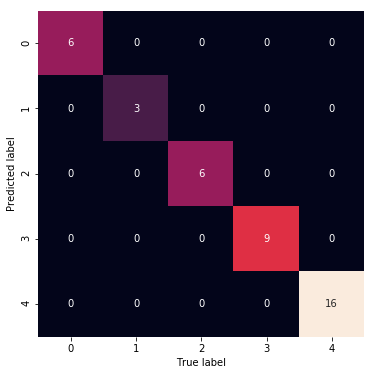

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#Obtengamos algunas predicciones para evaluar el rendimiento del modelo
y_fit = model.predict(X_test)

print(classification_report(y_test,y_fit))

cm = confusion_matrix(y_test,y_fit)

plt.figure(figsize=(6,6))
sns.heatmap(cm.T ,square=True , annot=True, cbar=False, xticklabels=True)
plt.xlabel('True label')
plt.ylabel('Predicted label')

Vemos que el modelo tiene un rendimiento muy bueno en este caso. Realicemos el modelamiento utilizando ahora un bosque aleatorio.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, n_jobs=-1, min_samples_split=8, max_depth=9)

model.fit(X_train,y_train)

y_fit = model.predict(X_test)

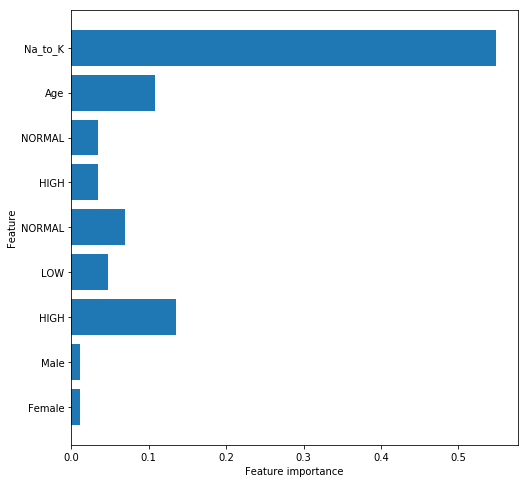

In [ ]:
def plot_feature_importances_cancer(model):
  n_features = df.iloc[:,:-1].shape[1]
  plt.figure(figsize=(8,8))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), df.columns.to_list())
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  
plot_feature_importances_cancer(model)

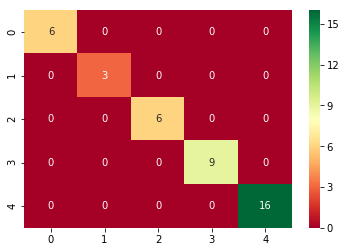

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True, cmap='RdYlGn');

En este caso el rendimiento en ambos casos es muy similar.

### Ejercicio 2.

1. Importe el dataset Iris del módulo `sklearn.datasets` como `load_iris` y seleccione sólo las últimas dos características (el dataset contiene 4 características), correspondientes a "petal lenght" y "petal width". Recuerde que se accede a las características y etiquetas mediante los atributos `data` y `target`, respectivamente.
2. Divida los datos en los conjuntos de entrenamiento y prueba. Busque el valor óptimo para el hiperparámetro `max_depth` en el rango (2,10) y entrene el modelo con este valor.
3. Realice una visualización del árbol utilizando el método Graphviz
4. Utilice el siguiente código para visualizar la clasificación que se realizó:

### De click **aquí** para ver el código de visualización:
<!---
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()
--->

5. Utilice el método `classification_report` para ver el rendimiento del modelo y grafique la matriz de confusión correspondiente.
6. Utilice el método GridSearch para buscar los valores óptimos de los hiperparámetros `max_depth` y `min_samples_split` en el rango (2,10), y entrene un modelo de Bosques Aleatorios con estos valores utilizando 100 árboles de decisión.
7. Realice una evaluación del rendimiento del modelo con el método `classification_report` y la matriz de confusión. Compare con los resultados obtenidos con el árbol de decisión.

De click **aquí** para visualizar la solución:

<!---
#1
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

iris = load_iris()

X = iris.data[:, 2:] # petal length and width
y = iris.target

#2
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 10)

grid_param = {'max_depth':np.arange(2,10)}

DT = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(DT, grid_param, cv=5)
grid.fit(X_train,y_train)

print(grid.best_params_)

model = DecisionTreeClassifier(max_depth = 2, random_state = 10)
model.fit(X_train, y_train)

#3
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file="iris_tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

with open("iris_tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

#5
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_fit = model.predict(X_test)

print(classification_report(y_test,y_fit))

cm = confusion_matrix(y_test,y_fit)

plt.figure(figsize=(6,6))
sns.heatmap(cm.T ,square=True , annot=True, cbar=False, xticklabels=True)
plt.xlabel('True label')
plt.ylabel('Predicted label')

#6
from sklearn.ensemble import RandomForestClassifier

grid_param = {'max_depth':np.arange(2,10), "min_samples_split":np.arange(2,10)}

rf = RandomForestClassifier(n_estimators=100, random_state = 10)

grid = GridSearchCV(rf, grid_param, cv = 5)

grid.fit(X_train,y_train)
print(grid.best_params_)

model = RandomForestClassifier(max_depth = 2, min_samples_split = 2, random_state = 1)
model.fit(X_train, y_train)

#7
y_fit = model.predict(X_test)

print(classification_report(y_test,y_fit))

cm = confusion_matrix(y_test,y_fit)

plt.figure(figsize=(6,6))
sns.heatmap(cm.T ,square=True , annot=True, cbar=False, xticklabels=True)
plt.xlabel('True label')
plt.ylabel('Predicted label')
--->

<p><a name="kMeans"></a></p>

# 3. Aprendizaje No supervisado: Agrupamiento mediante k-means

[[Contenidos]](#contents)

El **principal** reto en el aprendizaje no supervisado consiste en evaluar cuándo un algoritmo aprende algo útil. Los algoritmos no supervisados se usan, normalmente, en datos de los cuales no se tiene etiquetas, de tal forma que no sabemos cual debe ser la salida correcta. Por tal motivo, resulta muy dificil identificar cuando un modelo se desempeña bien. Por ejemplo, supongamos que una plataforma debe usar un algoritmo para organizar las fotos que se suben a un sitio web; nuestro algoritmo de agrupamiento hipotético podría haber agrupado todas las imágenes que muestran caras en el perfil y todas las imágenes de cara completa. Sin duda, esta sería una forma posible de dividir una colección de imágenes de los rostros de las personas, pero no sería adecuada si queremos organizar las fotos que contengan a todos nuestros amigos, por ejemplo. Sin embargo, no hay forma de que "digamos" al algoritmo lo que estamos buscando, por lo que, a menudo, la única forma de evaluar el resultado de un algoritmo no supervisado es inspeccionarlo manualmente.

Como consecuencia, los algoritmos no supervisados pueden ser usados en una fase exploratoria, como parte de un sistema automático más grande. Otra aplicación común para algoritmos no supervisados es como un paso de preprocesamiento para algoritmos supervisados. El aprendizaje de una nueva representación de los datos a veces puede mejorar la precisión de los algoritmos supervisados, o puede conducir a una reducción de la memoria y el consumo de tiempo. 

A continuación veremos uno de los algoritmos no supervisados de agrupamiento, conocido como `k-means`.

# Clustering:

El *Clustering* corresponde a la tarea de particionar el dataset en grupos, los cuales son llamados *clusters*. El objetivo consiste en separar los datos de tal forma que los puntos dentro de un cluster sean muy similares y se diferencien con puntos de otros clusters. De forma similar a los algoritmos de clasificación, los algoritmos de agrupamiento asignan (o predicen) un número a cada punto de los datos, lo que indica a qué cluster pertenece un punto en particular.

## k-Means Clustering

La agrupación *k-means* es uno de los algoritmos de agrupación más simples y más usados. Mediante éste, se intenta encontrar los centros de los clusters que sean representativos de ciertas regiones de los datos. El algoritmo alterna tres pasos en su ejecución: 

1. Se determina el número clusters en los que se quiere dividir los datos. Se asignará un pseudocentro inicial de características $Xc_i$, determinado de forma aleatoria o manualmente, para cada cluster.
2. Buscar alrededor de cada pseudo-centro los puntos del dataset más cercano.
3. Recalcular cada pseudo-centro como la media de los puntos de datos determinada en el punto 2. 

El algoritmo finaliza cuando la asignación de instancias a clústeres ya no cambia. 

De forma general, el algoritmo de **k-means** intenta minimizar la distancias dentro de un cluster y maximizar la distancia entre clusters, para los pseudo-centros iniciales.

En este algoritmo, se separan los grupos en k-grupos de igual varianza mediante un criterio de minimización conocido como la **inercia** o **suma de cuadrados dentro de un cluster**.

El algoritmo de `k-means` divide un conjunto $X$ de $N$ muestras en $K$ clusters $C$ separados, cada uno de ellos descrito por el valor medio $\mu_j$. A estos valores medios se les conoce, comunmente, como "centroides"; tenga en cuenta que estos punto no son, en general, puntos de $X$, aunque pertenecen al mismo espacio. 

El algoritmo de `K-means` intenta determinar centroides que minimizan la **inercia**, o **suma de cuadrados dentro de un cluster**:

\begin{equation}
\sum_{i=0}^n \min_{\mu_j\in C}(||x_i-\mu_j||^2)
\end{equation}

La inercia se puede pensar como una medida de la coherencia interna de los clústeres. En el ejercicio a desarollar, veremos como usar este factor para determinar un número optimo de $k$ del número de clusters.

En la siguiente animación se ilustra el poroceso iteratívo empleado en k-means para realizar el la agrupación en 4 clusters.


![SegmentLocal](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif "segment")

En la siguiente figura, se ilustra el algoritmo de k-means de forma "estática" y para 3 vecinos.

In [ ]:
!pip install mglearn

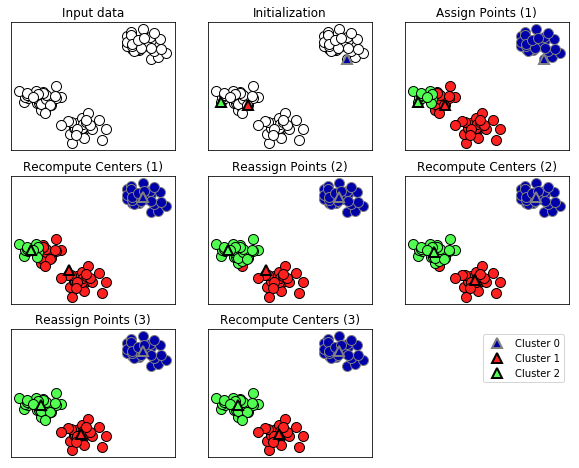

In [ ]:
import mglearn 

mglearn.plots.plot_kmeans_algorithm()

Los centros de los clúster son representados con triángulos, mientras que los puntos de datos son respresentados por círculos. Los colores indican pertenencia a un cluster. Inicializamos el algorítmo con tres puntos de datos aleatoriamente como centros de grupos, suponiendo que estamos buscando tres grupos. Este algorítmo iterativo inicia asignando a cada punto del dataset el centro de clúster más cercano. A continuación, los centros de los clusters se recalculan mediante la media de los puntos asignados. Luego, el proceso se repite dos veces más. Después de la tercera iteración, la asignación de puntos a los centros de clúster se no cambia, por lo que el algoritmo se detiene. 

Para un nuevo dato, el algoritmo `k-means` lo asignará al clúster más cercano. El siguiente ejemplo muestra los límites de los centros de los clusters "aprendidos" de los datos anteriores:

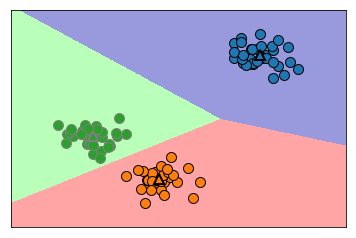

In [ ]:
mglearn.plots.plot_kmeans_boundaries()

## k-means usando scikit-learn

La aplicación del algoritmo de `k-means`con `scikit-learn` es bastante sencilla. Este método lo usaremos en la ilustración del problema tratado en la gráfica anterior. En primer lugar, instanciamos la clase `KMeans`, y establecemos el número de clusters que estamos buscando; en caso de no saberlo, se tiene por defecto que `n_clusters=8`. En segundo lugar, ajustamos el método a los datos. Veamos a continuación estos pasos y una gráfica del dataset inicial:

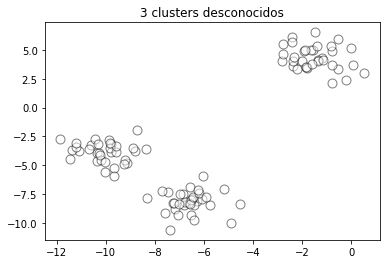

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

plt.scatter(X[:,0],X[:,1], s=80, marker='o',alpha=0.5, edgecolor='black', linewidth='1', facecolor="w")
plt.title("3 clusters desconocidos")

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X);

En la ejecución del algoritmo, a cada dato de entrenamiento en $X$ se le asigna una etiqueta del cluster más cercano. Para consultar estas etiquetas, se puede acceder al atributo `kmeans.labels_`

In [ ]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Como asignamos un valor de 3 al número de clusters a determinar, las etiquetas están numeradas entre 0 y 2. 

Podemos asignar etiquedas de clusters a datos nuevos, usando el método `predict`. Como hemos mencionado, a cada punto se le asigna la etiqueta del centro del cluster más cercano, **sin cambiar el modelo existente**. Al ejecutar el método `predict` sobre los datos de entrenamiento, tendremos la misma salida que en la celda anterior, accediendo al atributo `labels_`:

In [ ]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Advertimos entonces, que el agrupamiento es similar a la clasificación, en el sentido que asignamos a cada dato una etiqueta. No obstante, no tenemos un conocimiento certero de los datos, y por ende, un signicado construido a priori. 

Si corremos el algoritmo nuevamente, podriamos obtener diferentes etiquetas dada la naturaleza aleatoria de la inicialización. 

A continuación se realiza una gráfica de los datos, nuevamente. Los centros de los clusters se encuentran almacenados en el atributo `cluster_centers_`, y se grafican como triangulos:

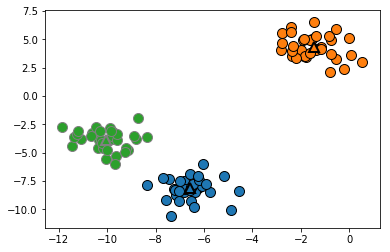

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

Podemos usar, por ejemplo, mas  o menos centros para la construcción del modelo:

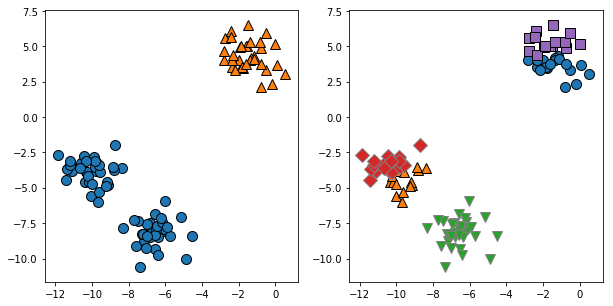

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

## Casos en los que k-means falla:

En `k-means` cada cluster se define solamente por su centro, lo que significa que cada cluster tiene una forma convexa. Debido a esto, `k-means` solo puede capturar formas relativamente simples. `k-means` asume tambien que todos los clusters tienen el mismo "diámetro", de alguna manera; mediante este algoritmo se delimitan las fronteras entre grupo en el punto medio de la distancia entre los centros. Este procedimiento puede tener consecuencias sorprendentes como las que se muestra a continuación:  

Text(0, 0.5, 'Feature 1')

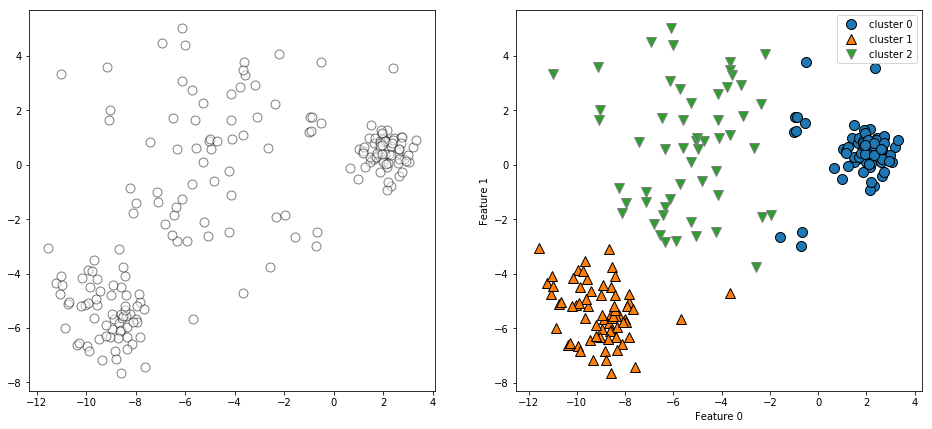

In [ ]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

plt.figure(figsize=(16,7))
plt.subplot(121)
plt.scatter(X_varied[:, 0], X_varied[:, 1], s=80, marker='o',alpha=0.5, edgecolor='black', linewidth='1', facecolor="w")
plt.subplot(122)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Esperariamos que la región densa en la parte inferior izquierda, fuese el primer cluster, seguido por la region densa se la esquina superior derecha, y la zona central, la cual es la zona menos densa, correspondería al tercer cluster. En su lugar, los cluster 0 y 1 presentan algunos puntos alejados del la aglomeración principal, alcanzando el centro de la gráfica.

En `k-means` se asume tambien que todas las direcciones son igual de importantes para cada cluster. En la siguiente gráfica se muestra un dataset bidimensional, en donde se obtienen tres grupos claramente diferenciados. No obstante, estos grupos están comprimidos diagonalmente. Dado que `k-means` solo considera la distancia al centro del cluster más cercano, no puede tratar este tipo de datos.

Text(0, 0.5, 'Feature 1')

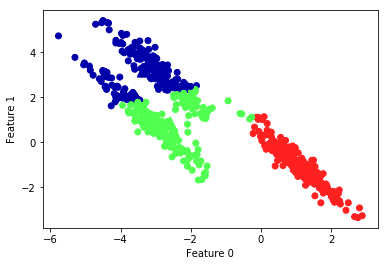

In [ ]:
import numpy as np

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

El desempeño del algoritmo `k-means` es pobre en los casos de distribuciones complejas, como las que vimos en forma de luna:

Text(0, 0.5, 'Feature 1')

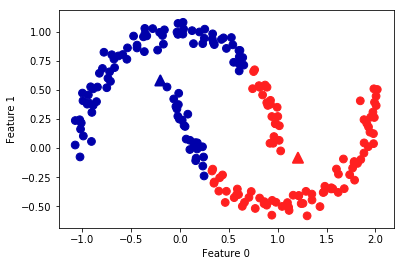

In [ ]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

En este caso, esperamos que el algoritmo pudiese recuperar los dos cachos de luna como clusters separado, sin embargo, no es posible con este tipo de algoritmo. 

Esta situación es una reminiscencia de la discusión en SVM donde usamos una transformación de kernel para proyectar los datos en una dimensión superior donde es posible una separación lineal. Podemos imaginar usar el mismo truco para permitir que k-means descubra límites no lineales.

Una versión de este k-means "kernelizado" se implementa en Scikit-Learn mediante el estimador `SpectralClustering`. Este utiliza el gráfico de los vecinos más cercanos para calcular una representación de mayor dimensionalidad de los datos, y luego asigna etiquetas usando el algoritmo de k-means


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


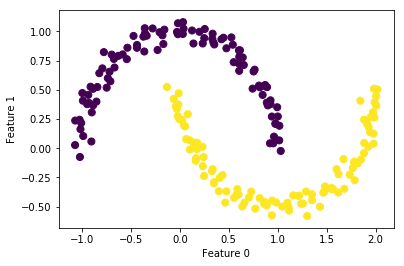

In [ ]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters = 2, affinity = "nearest_neighbors", assign_labels = "kmeans")

labels = model.fit_predict(X)

plt.scatter(X[:,0],X[:,1], c = labels, s = 50, cmap = "viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");


### Pros
1. `k-means` es un algoritmo muy popular debido a que es fácil de comprender e implementar.
2. El tiempo de ejecución es relativamente rápido. 
3. Es escalable facilmente a un gran número de datos.


### Cons

1. Se basa en la inicialización aleatoria de los centroides, lo que significa que la salida adel algoritmo depende de una semilla aleatoria. Para corregir esto, por defecto `scikit-learn` ejecuta el algoritmo 10 veces, y retorna el mejor resultado (entendiéndose por mejor, aquél en el que la suma de las varianzas de los clusters es más pequeña).
2. Es un algoritmo que está restringido a los supuestos realizados sobre la distribución de los grupos (mas o menos simétricos en todas las direcciones).
3. Se necesita especificar un número de centros, que pueden ser desconocido en aplicaciones reales.

### Ejercicio 1:

1. Use la función de numpy `random.seed()`, fijando la semilla en cero.
2. Genere un conjunto de datos $X$, $y$ usando la clase make_blobs, con una muestra de 5000 puntos, 4 centros determinados por los puntos [[4,4],[-2,-1],[2,-3],[1,1]] y una desviación standar de cada cluster de 0.9.
3. Realice una gráfica donde visualice la nube de puntos.
4. Mediante el atributo `inertia_`, de la clase `Kmeans` se obtiene la suma de cuadrados que representa el valor de inercia en un ajuste del modelo. Varie el número de centros $k$ entre 1 y 10 y verifique a partir de qué valor de se estabiliza la inercia. Realice una gráfica para visualizar dicha estabilización. Dicho punto de estabilización, representa el número de centros buscados, y debe coincidir con 4 centros.  
5. Instancie la clase KMeans con los siguiente atributos inicializados a los valores inicados:
    - `init=k-means++`, optimiza la velocidad de convergencia, seleccionando los centros de los clusters de forma más inteligente.
    - `n_clusters=4`
    - `n_init=12`, que corresponde al numero de veces que el algoritmo generará los centroides a partir de una semilla.
 
 y ajuste su modelo a los datos mediante el método `fit()`.
6. consulte los valores de las etiquetas y los centros de los clusters. 
7. Calcule un error relativo de los centros obtenidos respecto a los estipulados en la creación de la muestra.

De click **aquí** para ver la solución.

<!---

# importe las librerias:

import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

# P1

np.random.seed(0)

# P2

X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

# P3

plt.scatter(X[:, 0], X[:, 1], marker='.')

# P4

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# P5
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)

# P6
k_means_labels = k_means.labels_
k_means_labels

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

# P7

centers = [[-2, -1],[4,4], [1, 1],[2, -3]]
np.abs((k_means_cluster_centers-centers)/k_means_cluster_centers*100)


--->